In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder ,MinMaxScaler

In [2]:
from google .colab import files
uploaded=files.upload()

Saving layoffs_data(1).csv to layoffs_data(1).csv


In [3]:
data = pd.read_csv("layoffs_data(1).csv")
data

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Salesforce,SF Bay Area,Sales,700.0,0.01,26-01-2024,https://www.wsj.com/economy/jobs/salesforce-la...,65.0,Post-IPO,26-01-2024 14:26,United States,Unknown
1,Flexport,SF Bay Area,Logistics,NaN,0.20,26-01-2024,https://www.theinformation.com/articles/flexpo...,2400.0,Series E,26-01-2024 19:48,United States,Unknown
2,Microsoft,Seattle,Other,1900.0,NaN,25-01-2024,https://www.theverge.com/2024/1/25/24049050/mi...,1.0,Post-IPO,25-01-2024 14:42,United States,Unknown
3,Swiggy,Bengaluru,Food,400.0,0.07,25-01-2024,https://techcrunch.com/2024/01/25/swiggy-to-cu...,3600.0,Unknown,25-01-2024 14:45,India,Unknown
4,Veho,Boulder,Logistics,65.0,0.19,25-01-2024,https://techcrunch.com/2024/01/25/delivery-sta...,299.0,Series B,26-01-2024 19:50,United States,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3369,Service,Los Angeles,Travel,NaN,1.00,16-03-2020,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,31-08-2020 15:17,United States,Unknown
3370,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,13-03-2020,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,03-04-2020 04:47,United States,Unknown
3371,Panda Squad,SF Bay Area,Consumer,6.0,0.75,13-03-2020,https://twitter.com/danielsinger/status/123854...,1.0,Seed,17-04-2020 00:12,United States,Unknown
3372,Tamara Mellon,Los Angeles,Retail,20.0,0.40,12-03-2020,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,31-03-2020 16:04,United States,Unknown


In [4]:
data.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Salesforce,SF Bay Area,Sales,700.0,0.01,26-01-2024,https://www.wsj.com/economy/jobs/salesforce-la...,65.0,Post-IPO,26-01-2024 14:26,United States,Unknown
1,Flexport,SF Bay Area,Logistics,NaN,0.20,26-01-2024,https://www.theinformation.com/articles/flexpo...,2400.0,Series E,26-01-2024 19:48,United States,Unknown
2,Microsoft,Seattle,Other,1900.0,NaN,25-01-2024,https://www.theverge.com/2024/1/25/24049050/mi...,1.0,Post-IPO,25-01-2024 14:42,United States,Unknown
3,Swiggy,Bengaluru,Food,400.0,0.07,25-01-2024,https://techcrunch.com/2024/01/25/swiggy-to-cu...,3600.0,Unknown,25-01-2024 14:45,India,Unknown
4,Veho,Boulder,Logistics,65.0,0.19,25-01-2024,https://techcrunch.com/2024/01/25/delivery-sta...,299.0,Series B,26-01-2024 19:50,United States,Unknown


In [5]:
data.describe()

,Laid_Off_Count,Percentage,Funds_Raised
count,2219.000000,2172.000000,3014.000000
mean,247.385759,0.277849,774.266986
std,781.980691,0.282074,4850.752433
min,3.000000,0.000000,0.000000
25%,40.000000,0.100000,51.000000
50%,80.000000,0.170000,163.000000
75%,180.000000,0.300000,455.200000
max,12000.000000,1.000000,121900.000000


In [6]:
#data preprocessing
data.isnull().sum()

Company                          0
Location_HQ                      0
Industry                         0
Laid_Off_Count                1155
Percentage                    1202
Date                             0
Source                           0
Funds_Raised                   360
Stage                            0
Date_Added                       0
Country                          0
List_of_Employees_Laid_Off       1
dtype: int64

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

<ipython-input-7-a3ca093f8723>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [8]:
#Droping the rows wich are not having the Laid_Off_Count
data.dropna(subset=['Laid_Off_Count'], inplace=True)
data.dropna(subset=['Funds_Raised'], inplace=True)

In [9]:
print(data.columns)

Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Percentage',
       'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'List_of_Employees_Laid_Off'],
      dtype='object')


In [10]:
#droping the unuseful Columns cleaning data
columns_to_drop = ['Source', 'Date_Added', 'List_of_Employees_Laid_Off','Percentage','Company']
data.drop(columns=columns_to_drop, inplace=True)

In [11]:
data.head()

,Location_HQ,Industry,Laid_Off_Count,Funds_Raised,Stage,Country
Date,,,,,,
2024-01-26,SF Bay Area,Sales,700.0,65.0,Post-IPO,United States
2024-01-25,Seattle,Other,1900.0,1.0,Post-IPO,United States
2024-01-25,Bengaluru,Food,400.0,3600.0,Unknown,India
2024-01-25,Boulder,Logistics,65.0,299.0,Series B,United States
2024-01-24,Munich,HR,100.0,724.0,Series E,Germany


In [12]:
data.isnull().sum()

Location_HQ       0
Industry          0
Laid_Off_Count    0
Funds_Raised      0
Stage             0
Country           0
dtype: int64

In [13]:
#Label encoding for categorical columns
categorical_columns = ['Location_HQ', 'Industry', 'Stage', 'Country']
label_encoder = LabelEncoder()
data = data.copy()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = label_encoder.fit_transform(data[col])

print(data)

            Location_HQ  Industry  Laid_Off_Count  Funds_Raised  Stage  \
Date                                                                     
2024-01-26          117        25           700.0          65.0      1   
2024-01-25          128        20          1900.0           1.0      1   
2024-01-25           14        10           400.0        3600.0     15   
2024-01-25           21        16            65.0         299.0      5   
2024-01-24           94        11           100.0         724.0      8   
...                 ...       ...             ...           ...    ...   
2020-03-16            6        27            16.0           6.0      3   
2020-03-13           81        28             8.0          45.0     15   
2020-03-13          117         3             6.0           1.0      3   
2020-12-03           81        24            20.0          90.0      6   
2020-11-03          119        16            75.0          12.0      4   

            Country  
Date           

In [14]:
data

,Location_HQ,Industry,Laid_Off_Count,Funds_Raised,Stage,Country
Date,,,,,,
2024-01-26,117,25,700.0,65.0,1,43
2024-01-25,128,20,1900.0,1.0,1,43
2024-01-25,14,10,400.0,3600.0,15,15
2024-01-25,21,16,65.0,299.0,5,43
2024-01-24,94,11,100.0,724.0,8,12
...,...,...,...,...,...,...
2020-03-16,6,27,16.0,6.0,3,43
2020-03-13,81,28,8.0,45.0,15,43
2020-03-13,117,3,6.0,1.0,3,43


In [15]:
# ModelFitting
# Split the data into training, validation, and testing sets
train_size = int(len(data) * 0.8)
val_size = int(len(data) * 0.1)
train, val, test = data[:train_size], data[train_size:train_size+val_size], data[train_size+val_size:]

In [16]:
# Target variable and exogenous variables
target_variable = 'Laid_Off_Count'
exog_vars = ['Funds_Raised', 'Location_HQ', 'Industry', 'Stage', 'Country']

In [17]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)
test_scaled = scaler.transform(test)

In [18]:
# Train SARIMAX model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

In [19]:
model = SARIMAX(train_scaled[:, data.columns.get_loc(target_variable)],
                exog=train_scaled[:, data.columns.isin(exog_vars)],
                order=order, seasonal_order=seasonal_order)
results = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
# Forecast future values on the validation set
forecast_steps = len(val)
forecast = results.get_forecast(steps=forecast_steps,
                                exog=val_scaled[:, data.columns.isin(exog_vars)])

In [21]:
# Evaluate the model on the validation set
val_scaled_target = val_scaled[:, data.columns.get_loc(target_variable)]
forecast_predicted_mean = forecast.predicted_mean

In [22]:
mse = mean_squared_error(val_scaled_target, forecast_predicted_mean)
mae = mean_absolute_error(val_scaled_target, forecast_predicted_mean)
rmse = np.sqrt(mse)
r2 = r2_score(val_scaled_target, forecast_predicted_mean)

In [23]:
print(f'Mean Squared Error (MSE) on Validation Set: {mse}')
print(f'Mean Absolute Error (MAE) on Validation Set: {mae}')
print(f'Root Mean Squared Error (RMSE) on Validation Set: {rmse}')
print(f'R^2 Score on Validation Set: {r2}')

Mean Squared Error (MSE) on Validation Set: 0.0012321636284424217
Mean Absolute Error (MAE) on Validation Set: 0.02116522657530105
Root Mean Squared Error (RMSE) on Validation Set: 0.03510218837113182
R^2 Score on Validation Set: 0.026412778871063303


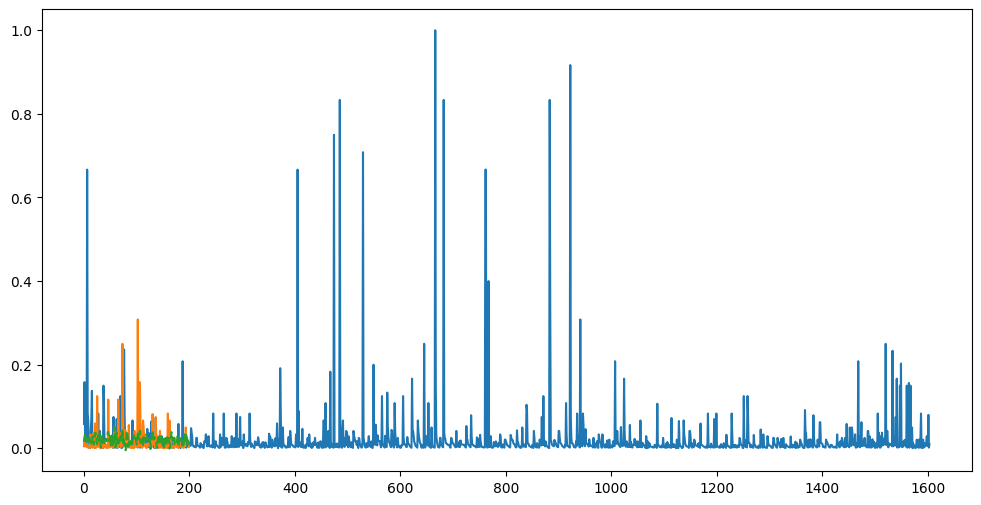

In [24]:
# Plot the results on the validation set
plt.figure(figsize=(12, 6))
plt.plot(train_scaled[:, data.columns.get_loc(target_variable)], label='Train')
plt.plot(val_scaled_target, label='Validation')
plt.plot(forecast_predicted_mean, label='Forecast', linestyle='dashed')

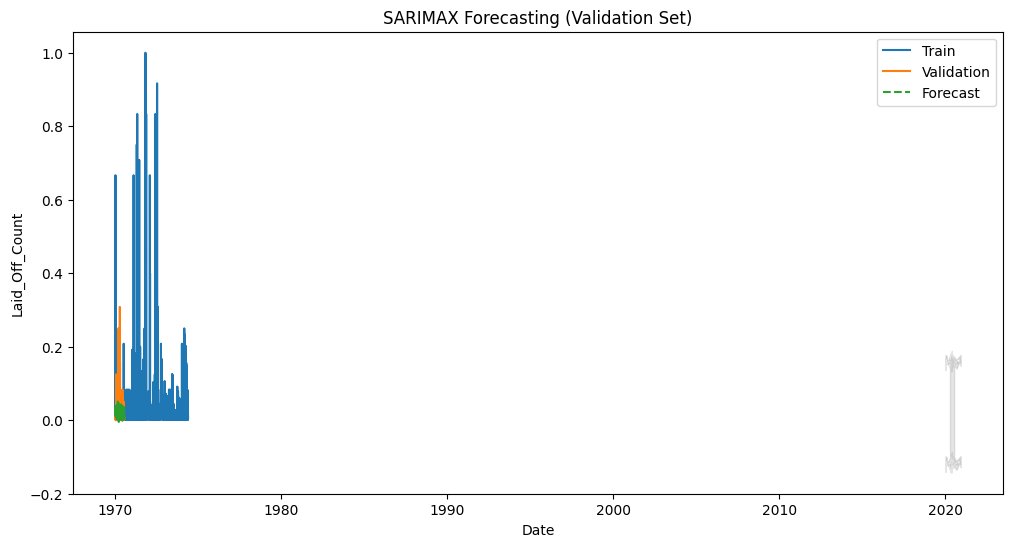

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(train_scaled[:, data.columns.get_loc(target_variable)], label='Train')
plt.plot(val_scaled_target, label='Validation')
plt.plot(forecast_predicted_mean, label='Forecast', linestyle='dashed')


# Plot confidence intervals
conf_int = forecast.conf_int()
plt.fill_between(val.index, conf_int[:, 0], conf_int[:, 1], color='k', alpha=0.1)

plt.title('SARIMAX Forecasting (Validation Set)')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.legend()
plt.show()

In [26]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [27]:
# Forecast future values on the test set
forecast_steps_test = len(test)
forecast_test = results.get_forecast(steps=forecast_steps_test, exog=test_scaled[:, data.columns.isin(exog_vars)])


In [28]:
# Evaluate the model on the test set
test_scaled_target = test_scaled[:, data.columns.get_loc(target_variable)]
forecast_test_predicted_mean = forecast_test.predicted_mean

In [29]:
mse_test = mean_squared_error(test_scaled_target, forecast_test_predicted_mean)
mae_test = mean_absolute_error(test_scaled_target, forecast_test_predicted_mean)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(test_scaled_target, forecast_test_predicted_mean)

In [30]:
print(f'Mean Squared Error (MSE) on Test Set: {mse_test}')
print(f'Mean Absolute Error (MAE) on Test Set: {mae_test}')
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_test}')
print(f'R^2 Score on Test Set: {r2_test}')

Mean Squared Error (MSE) on Test Set: 0.0005299132306329683
Mean Absolute Error (MAE) on Test Set: 0.016293248876048588
Root Mean Squared Error (RMSE) on Test Set: 0.023019844279077308
R^2 Score on Test Set: -0.24524966177963003


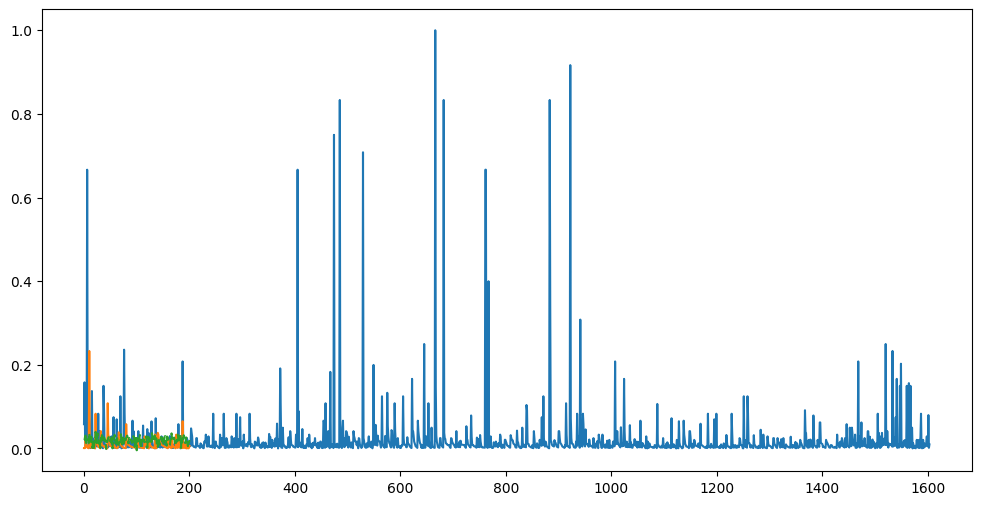

In [31]:
# Plot the results on the test set
plt.figure(figsize=(12, 6))
plt.plot(train_scaled[:, data.columns.get_loc(target_variable)], label='Train')
plt.plot(test_scaled_target, label='Test')
plt.plot(forecast_test_predicted_mean, label='Forecast', linestyle='dashed')

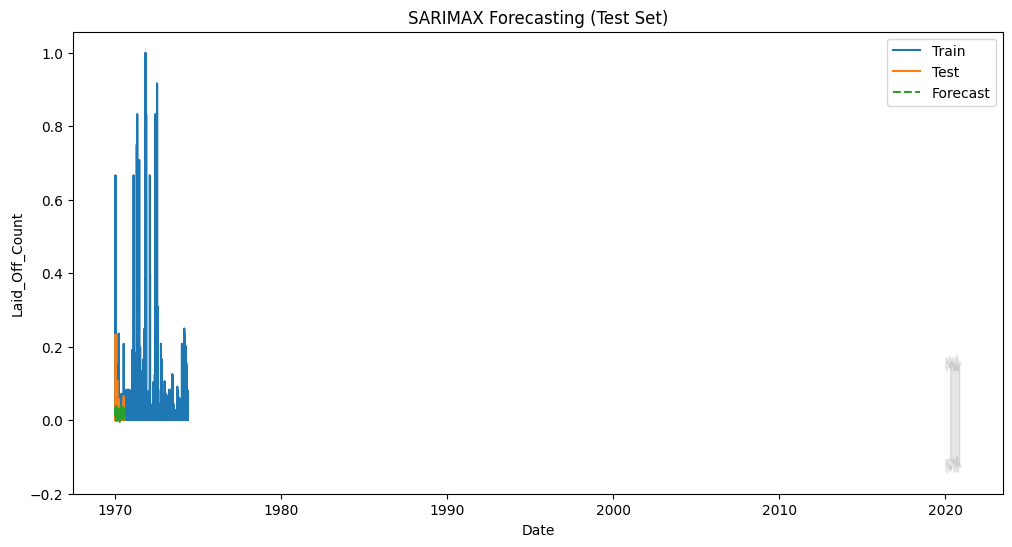

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(train_scaled[:, data.columns.get_loc(target_variable)], label='Train')
plt.plot(test_scaled_target, label='Test')
plt.plot(forecast_test_predicted_mean, label='Forecast', linestyle='dashed')

# Plot confidence intervals for the test set
conf_int_test = forecast_test.conf_int()
plt.fill_between(test.index, conf_int_test[:, 0], conf_int_test[:, 1], color='k', alpha=0.1)

plt.title('SARIMAX Forecasting (Test Set)')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.legend()
plt.show()